# House Price in New York City from 2016 to 2019

# Introduction.

 New York City is one of the most well known cities in the United States. New York City globally is recognized as the largest megacity by urban landmass whose population is more than eight millions people in 2019 (Demographia). The city attracts people, businesses and international organizations because of culture, entertainment, economics, technologies, education, tourism and sport, etc. To illustrate, the Headquarters of the United Nations is establised in New York City (United Nations Visitor Centre). As a result, house price becomes increasingly valuable. In this Capstone Project, thanks to IBM Professional Data Science Certificate's serrial classes, I would like to analyse house price in New York City from 2016 to 2019.           

# Data 

 In this project, data which I would like to use to support my analysis is 

 + "New York City Citywide Annualized Calendar Sales" from 2016 to 2019 (updated on March 03, 2020).
 
 (Link: https://data.cityofnewyork.us/City-Government/NYC-Citywide-Annualized-Calendar-Sales-Update/w2pb-icbu)
 
 + Venues in New York City which are collected from Foursquare API using Python.
 
 (Link: https://foursquare.com/developers/apps)
 

# Methodology

 # I would like to use Python to support my analysis.

In [151]:
import random 
import numpy as np
import pandas as pd
import requests
from pandas.io.json import json_normalize
import json

In [152]:
!wget -q -O 'newyork_houseprice.csv' https://data.cityofnewyork.us/api/views/w2pb-icbu/rows.csv?accessType=DOWNLOAD
print('Data downloaded!')

Data downloaded!


In [153]:
newyork_houseprice = pd.read_csv('newyork_houseprice.csv')
newyork_houseprice

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL,ADDRESS,APARTMENT NUMBER,...,SALE PRICE,SALE DATE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1,FINANCIAL,14 RENTALS - 4-10 UNIT,2A,7,38,NaN,S9,60 PEARL STREET,NaN,...,4027000,01/01/2016,40.703553,-74.011152,101.0,1.0,9.0,1000014.0,1.000070e+09,Battery Park City-Lower Manhattan
1,1,HARLEM-EAST,01 ONE FAMILY DWELLINGS,1,1643,122,NaN,A4,155 EAST 115 STREET,NaN,...,0,01/01/2016,40.797761,-73.941667,111.0,8.0,182.0,1052276.0,1.016430e+09,East Harlem North
2,1,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,2,1643,123,NaN,C5,157 EAST 115 STREET,NaN,...,0,01/01/2016,40.797744,-73.941627,111.0,8.0,182.0,1052277.0,1.016430e+09,East Harlem North
3,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1320,4247,NaN,R4,211 EAST 46TH STREET,33J,...,0,01/01/2016,40.753118,-73.972085,106.0,4.0,90.0,1037599.0,1.013208e+09,Turtle Bay-East Midtown
4,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1365,1526,NaN,R4,400 EAST 54TH STREET,30H,...,0,01/01/2016,40.756237,-73.963995,106.0,4.0,8603.0,1076281.0,1.013658e+09,Turtle Bay-East Midtown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345054,5,WOODROW,01 ONE FAMILY DWELLINGS,1,7267,346,NaN,A5,109 SALAMANDER COURT,NaN,...,0,01/25/2019,40.539191,-74.222818,503.0,51.0,226.0,5116919.0,5.072670e+09,Charleston-Richmond Valley-Tottenville
345055,5,WOODROW,02 TWO FAMILY DWELLINGS,1,6967,13,NaN,B9,1001 RATHBUN AVENUE,NaN,...,590000,01/11/2019,40.536236,-74.209270,503.0,51.0,20803.0,5085326.0,5.069670e+09,Rossville-Woodrow
345056,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7014,76,NaN,B2,19 WOODROSE LANE,NaN,...,0,01/31/2019,40.535069,-74.215249,503.0,51.0,20803.0,5151490.0,5.070140e+09,Rossville-Woodrow
345057,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7020,403,NaN,B2,66 DEXTER AVENUE,NaN,...,0,01/24/2019,40.539712,-74.215793,503.0,51.0,20803.0,5133074.0,5.070200e+09,Rossville-Woodrow


In [154]:
newyork_houseprice[['BOROUGH','NEIGHBORHOOD','Latitude','Longitude']]

,BOROUGH,NEIGHBORHOOD,Latitude,Longitude
0,1,FINANCIAL,40.703553,-74.011152
1,1,HARLEM-EAST,40.797761,-73.941667
2,1,HARLEM-EAST,40.797744,-73.941627
3,1,MIDTOWN EAST,40.753118,-73.972085
4,1,MIDTOWN EAST,40.756237,-73.963995
...,...,...,...,...
345054,5,WOODROW,40.539191,-74.222818
345055,5,WOODROW,40.536236,-74.209270
345056,5,WOODROW,40.535069,-74.215249
345057,5,WOODROW,40.539712,-74.215793


In [155]:
!pip install shapely
import shapely.geometry


In [156]:
!pip install folium
import folium

In [157]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

Solving environment: done

# All requested packages already installed.



In [158]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


# Let's group newyork_houseprice by neighborhood, calculate the mean of Sale Price and sort in an desceding value.

In [159]:
newyork_houseprice1 = newyork_houseprice.groupby(['NEIGHBORHOOD'], as_index=False).mean()
newyork_houseprice1

,NEIGHBORHOOD,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
0,AIRPORT JFK,4.0,14260.000000,70.000000,NaN,11430.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.800000e+06,40.653478,-73.766948,483.000000,31.000000,716.000000,4.000000e+06,4.142600e+09
1,AIRPORT LA GUARDIA,4.0,962.090909,159.606061,NaN,11370.000000,1.787879,0.000000,1.787879,1773.060606,1.181818,4.584548e+05,40.771195,-73.889635,401.000000,22.000000,317.000000,4.077388e+06,4.009622e+09
2,ALPHABET CITY,1.0,391.157585,523.279823,NaN,9640.335788,4.001600,0.225600,4.256000,1723.901198,2.067747,1.867883e+06,40.725022,-73.980111,103.000000,2.000000,1321.272048,1.035921e+06,1.003915e+09
3,ANNADALE,5.0,6254.385071,66.623223,NaN,9701.099526,1.181280,0.020142,1.202607,1795.080626,1.075829,4.646858e+05,40.537659,-74.176802,503.000000,51.000000,10514.257596,5.099909e+06,5.062489e+09
4,ARDEN HEIGHTS,5.0,5910.533011,255.901771,NaN,10253.877617,1.107890,0.003221,1.111111,1967.239130,1.004831,3.380856e+05,40.555116,-74.191943,503.000000,51.000000,17008.790204,5.105718e+06,5.059109e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,WOODHAVEN,4.0,8942.511869,63.919659,NaN,11420.813147,1.776019,0.073646,1.849665,1911.040195,1.082775,4.328042e+05,40.691136,-73.857585,409.000000,31.321078,130.507966,4.191735e+06,4.089426e+09
257,WOODLAWN,2.0,3381.955556,44.400000,NaN,10470.000000,1.708824,0.032353,1.741176,1924.736111,1.397222,3.487051e+05,40.898875,-73.868076,212.000000,11.000000,44994.889213,2.023048e+06,2.033819e+09
258,WOODROW,5.0,7108.779370,109.161891,NaN,10308.975645,1.328080,0.017192,1.345272,1976.863702,1.012894,4.418060e+05,40.538997,-74.216149,502.995665,50.995665,8551.531792,5.117127e+06,5.070996e+09
259,WOODSIDE,4.0,1323.883541,219.210339,NaN,11335.628045,1.514801,0.150579,2.331403,1895.669052,1.917409,6.003215e+05,40.747926,-73.905001,401.803744,25.502415,939.500604,4.164385e+06,4.013193e+09


In [160]:
newyork_houseprice1.sort_values(['SALE PRICE'], ascending=False, axis=0, inplace=True)
newyork_houseprice1.head()

,NEIGHBORHOOD,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
154,MIDTOWN CBD,1.0,1300.198824,869.581176,NaN,10021.363529,1.209418,2.054523,3.379182,1799.004860,2.367059,2.001103e+07,40.759785,-73.971888,105.267221,4.000000,5623.988124,1.051789e+06,1.013007e+09
131,JAVITS CENTER,1.0,716.293785,718.892655,NaN,10005.274011,3.128655,0.529240,3.725146,1842.488439,2.426554,1.243853e+07,40.753977,-73.999927,104.000000,3.000000,103.701754,1.053495e+06,1.007163e+09
80,FASHION,1.0,815.562401,586.377567,NaN,9867.426540,2.156507,7.252059,12.387150,1816.901587,2.819905,1.197399e+07,40.750431,-73.987757,104.869067,3.553191,90.749591,1.040832e+06,1.004854e+09
73,EAST RIVER,2.0,5541.000000,200.000000,NaN,10465.000000,0.000000,1.000000,1.000000,1974.000000,4.000000,1.120000e+07,40.826369,-73.840158,210.000000,13.000000,90.000000,2.079871e+06,2.055410e+09
82,FINANCIAL,1.0,39.337349,1171.274096,NaN,10012.738554,1.521264,0.559538,2.111179,1870.136307,2.200000,8.989095e+06,40.707089,-74.010465,101.000000,1.000000,369.538879,1.045088e+06,1.000400e+09


# Let's map neighborhoods in New York City

Let's remove NaN values in longitude and latitude columns.

In [161]:
newyork_houseprice1=newyork_houseprice1.dropna(subset=['Longitude'])

newyork_houseprice1=newyork_houseprice1.dropna(subset=['Latitude'])

In [162]:
newyork_houseprice2 = newyork_houseprice1[['BOROUGH','NEIGHBORHOOD','SALE PRICE','Latitude','Longitude']]
newyork_houseprice2.rename(columns={'NEIGHBORHOOD':'Neighborhood'}, inplace=True)
newyork_houseprice2

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude
154,1.0,MIDTOWN CBD,2.001103e+07,40.759785,-73.971888
131,1.0,JAVITS CENTER,1.243853e+07,40.753977,-73.999927
80,1.0,FASHION,1.197399e+07,40.750431,-73.987757
73,2.0,EAST RIVER,1.120000e+07,40.826369,-73.840158
82,1.0,FINANCIAL,8.989095e+06,40.707089,-74.010465
...,...,...,...,...,...
28,4.0,BROAD CHANNEL,2.273576e+05,40.605090,-73.819865
183,2.0,PARKCHESTER,2.080169e+05,40.838793,-73.860501
241,2.0,VAN CORTLANDT PARK,1.763952e+05,40.891859,-73.897216
96,5.0,FRESH KILLS,1.455078e+05,40.558916,-74.196839


Let's sort newyork_houseprice2 in an descending SALE PRICE order

In [163]:
newyork_houseprice2.sort_values(['SALE PRICE'], ascending=False, axis=0, inplace=True)
newyork_houseprice2

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude
154,1.0,MIDTOWN CBD,2.001103e+07,40.759785,-73.971888
131,1.0,JAVITS CENTER,1.243853e+07,40.753977,-73.999927
80,1.0,FASHION,1.197399e+07,40.750431,-73.987757
73,2.0,EAST RIVER,1.120000e+07,40.826369,-73.840158
82,1.0,FINANCIAL,8.989095e+06,40.707089,-74.010465
...,...,...,...,...,...
28,4.0,BROAD CHANNEL,2.273576e+05,40.605090,-73.819865
183,2.0,PARKCHESTER,2.080169e+05,40.838793,-73.860501
241,2.0,VAN CORTLANDT PARK,1.763952e+05,40.891859,-73.897216
96,5.0,FRESH KILLS,1.455078e+05,40.558916,-74.196839


In [164]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood, sale in zip(newyork_houseprice2['Latitude'], newyork_houseprice2['Longitude'], newyork_houseprice2['BOROUGH'], newyork_houseprice2['Neighborhood'],newyork_houseprice2['SALE PRICE']):
    label = '{}, {}'.format(neighborhood, borough, sale)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

# Let's calculate the optimum K Mean using K Means Elbow Method.

In [165]:
newyork_houseprice3 = newyork_houseprice2.drop('Neighborhood', axis=1)
newyork_houseprice3

,BOROUGH,SALE PRICE,Latitude,Longitude
154,1.0,2.001103e+07,40.759785,-73.971888
131,1.0,1.243853e+07,40.753977,-73.999927
80,1.0,1.197399e+07,40.750431,-73.987757
73,2.0,1.120000e+07,40.826369,-73.840158
82,1.0,8.989095e+06,40.707089,-74.010465
...,...,...,...,...
28,4.0,2.273576e+05,40.605090,-73.819865
183,2.0,2.080169e+05,40.838793,-73.860501
241,2.0,1.763952e+05,40.891859,-73.897216
96,5.0,1.455078e+05,40.558916,-74.196839


In [166]:
from sklearn.preprocessing import StandardScaler

X = newyork_houseprice3.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 9.00557140e+00,  6.27598889e-01, -1.58061766e-01],
       [ 5.36852916e+00,  5.67717196e-01, -3.88447499e-01],
       [ 5.14541166e+00,  5.31155547e-01, -2.88451715e-01],
       [ 4.77366567e+00,  1.31408336e+00,  9.24338143e-01],
       [ 3.71177624e+00,  8.42945411e-02, -4.75036076e-01],
       [ 3.65576500e+00, -9.47889509e-01, -1.89149505e+00],
       [ 3.30534926e+00,  7.24867420e-01, -1.34301973e-01],
       [ 3.14065869e+00, -4.68436748e-01,  1.52588847e+00],
       [ 1.64426215e+00,  2.62669701e-01, -4.16342502e-01],
       [ 1.62782032e+00,  1.68809446e-01, -4.91644002e-01],
       [ 1.59497480e+00, -2.55701309e-01, -3.10696372e-01],
       [ 1.55104730e+00,  1.73254403e-01, -4.36796654e-01],
       [ 1.49939002e+00,  4.22770210e-01, -3.10618764e-01],
       [ 1.39016215e+00,  4.69111668e-01, -3.83987807e-01],
       [ 1.21989793e+00,  2.38959387e-01, -3.49554824e-01],
       [ 1.16173061e+00,  6.68358788e-01, -2.33981271e-01],
       [ 1.02843888e+00, -3.42684911e-02

In [167]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

In [168]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_dataset)
    Sum_of_squared_distances.append(km.inertia_)


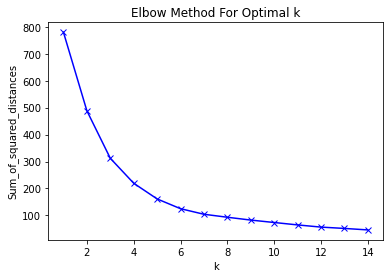

In [169]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# The map suggests that K = 6 would be optimal.

In [170]:
num_clusters = 6

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels=k_means.labels_

print(labels)

[2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 3 3
 3 3 0 0 3 3 3 3 1 3 0 3 3 3 0 1 3 0 3 3 0 0 3 3 0 1 3 1 4 0 3 1 0 0 0 1 0
 1 4 1 0 5 0 1 1 1 1 0 0 4 5 1 0 0 5 1 3 0 0 5 1 5 1 1 0 1 1 0 1 5 4 1 5 5
 0 4 1 1 1 5 0 0 4 1 1 1 1 1 1 1 1 0 5 1 0 4 5 1 5 1 5 5 1 4 5 5 5 5 4 1 5
 4 4 1 0 5 1 5 4 5 4 5 0 5 4 4 0 5 0 1 0 5 5 4 1 4 4 4 0 5 5 0 1 0 5 1 4 4
 1 1 5 1 5 0 4 4 5 4 4 4 4 5 4 4 5 5 0 1 4 4 5 1 0 4 4 4 4 0 5 5 0 4 0 5 0
 1 4 5 4 4 4 4 5 5 5 4 5 5 5 1 4 4 5 4 1 4 4 4 5 4 4 1 4 4 5 4 4 4 1 0 0 4
 0]


# Let's insert K Means Labels into newyork_houseprice3.

In [171]:
newyork_houseprice3["Labels"] = labels
newyork_houseprice3

,BOROUGH,SALE PRICE,Latitude,Longitude,Labels
154,1.0,2.001103e+07,40.759785,-73.971888,2
131,1.0,1.243853e+07,40.753977,-73.999927,2
80,1.0,1.197399e+07,40.750431,-73.987757,2
73,2.0,1.120000e+07,40.826369,-73.840158,2
82,1.0,8.989095e+06,40.707089,-74.010465,2
...,...,...,...,...,...
28,4.0,2.273576e+05,40.605090,-73.819865,1
183,2.0,2.080169e+05,40.838793,-73.860501,0
241,2.0,1.763952e+05,40.891859,-73.897216,0
96,5.0,1.455078e+05,40.558916,-74.196839,4


# Let's group the column Labels.

In [172]:
newyork_houseprice4 = newyork_houseprice3.groupby(['Labels'], as_index=False).mean()
newyork_houseprice4

,Labels,BOROUGH,SALE PRICE,Latitude,Longitude
0,0,2.000000,8.576182e+05,40.848306,-73.878524
1,1,3.155364,6.966050e+05,40.635074,-73.942515
2,2,2.000000,1.117850e+07,40.728415,-73.966124
3,3,1.733333,2.486310e+06,40.732579,-73.980121
4,4,5.000000,4.298422e+05,40.587461,-74.133881
5,5,3.979494,4.877999e+05,40.712971,-73.804705


# Let's collect venue data from Foursquare API.

In [173]:
CLIENT_ID = 'DNABXROWWFS1LN3MICTUA1OAKWTZXZ1OEBCPYZPNY1UCNRQU' 
CLIENT_SECRET = 'RITGDNB32NKCSZMOFAFHKM24EFTXLCPKG4NK3VJPESXDAD1H' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DNABXROWWFS1LN3MICTUA1OAKWTZXZ1OEBCPYZPNY1UCNRQU
CLIENT_SECRET:RITGDNB32NKCSZMOFAFHKM24EFTXLCPKG4NK3VJPESXDAD1H


In [174]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Let's set the limit of venues is 600 and the radius is 800 when we collect venue data from Foursquare API.

In [175]:
LIMIT = 600
radius = 800
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [176]:


newyork_venues = getNearbyVenues(names=newyork_houseprice1['NEIGHBORHOOD'],
                                   latitudes=newyork_houseprice1['Latitude'],
                                   longitudes=newyork_houseprice1['Longitude']
                                  )




MIDTOWN CBD
JAVITS CENTER
FASHION
EAST RIVER
FINANCIAL
BLOOMFIELD
MANHATTAN-UNKNOWN
AIRPORT JFK
SOHO
TRIBECA
GOWANUS
CIVIC CENTER
FLATIRON
CHELSEA
LITTLE ITALY
MIDTOWN WEST
DOWNTOWN-METROTECH
GREENWICH VILLAGE-WEST
RED HOOK
HARLEM-WEST
BUSH TERMINAL
HARLEM-EAST
LONG ISLAND CITY
NAVY YARD
GREENWICH VILLAGE-CENTRAL
DOWNTOWN-FULTON FERRY
EAST VILLAGE
UPPER EAST SIDE (59-79)
LOWER EAST SIDE
UPPER WEST SIDE (59-79)
BROOKLYN HEIGHTS
DOWNTOWN-FULTON MALL
MOTT HAVEN/PORT MORRIS
UPPER WEST SIDE (96-116)
MOUNT HOPE/MOUNT EDEN
WILLIAMSBURG-NORTH
MIDTOWN EAST
UPPER EAST SIDE (79-96)
CLINTON
WASHINGTON HEIGHTS LOWER
HUNTS POINT
UPPER EAST SIDE (96-110)
UPPER WEST SIDE (79-96)
CHINATOWN
SOUTHBRIDGE
BROOKLYN-UNKNOWN
ALPHABET CITY
HARLEM-CENTRAL
KIPS BAY
MURRAY HILL
GRAMERCY
WASHINGTON HEIGHTS UPPER
SPRING CREEK
BOERUM HILL
BRONX-UNKNOWN
FORT GREENE
COBBLE HILL
HARLEM-UPPER
MORNINGSIDE HEIGHTS
MANHATTAN VALLEY
WILLIAMSBURG-EAST
FORDHAM
CARROLL GARDENS
WILLIAMSBURG-SOUTH
PARK SLOPE
ROSSVILLE-PORT MOBIL

KeyError: 'groups'

# Let's examine the size of venues.

In [177]:
print(newyork_venues.shape)
newyork_venues.head()

(14835, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MIDTOWN CBD,40.759785,-73.971888,Little Collins,40.760021,-73.969887,Coffee Shop
1,MIDTOWN CBD,40.759785,-73.971888,Rimowa,40.760627,-73.973677,Luggage Store
2,MIDTOWN CBD,40.759785,-73.971888,Phillips,40.761553,-73.970956,Art Gallery
3,MIDTOWN CBD,40.759785,-73.971888,Bumble & Bumble,40.759903,-73.969105,Salon / Barbershop
4,MIDTOWN CBD,40.759785,-73.971888,Four Seasons Hotel,40.761945,-73.971741,Hotel


# Let's count the total number of "Venue Category" in each neighborhood.

In [178]:
newyork_venues1 = newyork_venues.groupby(['Neighborhood'],as_index=False).count()
newyork_venues1

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AIRPORT JFK,13,13,13,13,13,13
1,AIRPORT LA GUARDIA,41,41,41,41,41,41
2,ALPHABET CITY,100,100,100,100,100,100
3,ANNADALE,19,19,19,19,19,19
4,ARDEN HEIGHTS,28,28,28,28,28,28
...,...,...,...,...,...,...,...
254,WOODHAVEN,68,68,68,68,68,68
255,WOODLAWN,41,41,41,41,41,41
256,WOODROW,6,6,6,6,6,6
257,WOODSIDE,100,100,100,100,100,100


There are 259 neighborhoods in New York City according to Foursquare API.

In [179]:
newyork_venues12 = newyork_venues.groupby(['Venue Category'],as_index=False).count()
newyork_venues12 = newyork_venues12[['Venue Category','Venue']].rename(columns={'Venue':'Counted in Neighborhoods'})
newyork_venues12

,Venue Category,Counted in Neighborhoods
0,Accessories Store,11
1,Afghan Restaurant,1
2,African Restaurant,10
3,Airport Service,2
4,American Restaurant,229
...,...,...
447,Wings Joint,22
448,Women's Store,24
449,Yoga Studio,125
450,Zoo,10


 We may see that there are 452 venues seperately, and the "Counted in Neighborhoods" column represents the quantity of each venue operating in New York City.

# Let's sort the number of venues, which are provided by Foursquare API, in an descending order.

In [180]:
newyork_venues12.sort_values(['Counted in Neighborhoods'], ascending=False, axis=0, inplace=True)
newyork_venues12

,Venue Category,Counted in Neighborhoods
317,Pizza Place,691
88,Coffee Shop,447
219,Italian Restaurant,431
112,Deli / Bodega,363
27,Bakery,345
...,...,...
293,Outdoor Supply Store,1
295,Outlet Mall,1
298,Pakistani Restaurant,1
302,Peking Duck Restaurant,1


# Let's convert newyork_venues1 which has "Neighborhood" column into string.

In [181]:
newyork_venues1.columns = list(map(str, newyork_venues1.columns))
newyork_venues1

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AIRPORT JFK,13,13,13,13,13,13
1,AIRPORT LA GUARDIA,41,41,41,41,41,41
2,ALPHABET CITY,100,100,100,100,100,100
3,ANNADALE,19,19,19,19,19,19
4,ARDEN HEIGHTS,28,28,28,28,28,28
...,...,...,...,...,...,...,...
254,WOODHAVEN,68,68,68,68,68,68
255,WOODLAWN,41,41,41,41,41,41
256,WOODROW,6,6,6,6,6,6
257,WOODSIDE,100,100,100,100,100,100


We may see that "newyork_houseprice2", which is from original data, has 260 neighborhoods while "newyork_venues1", which is from Foursquare API, has 259 neighborhoods. Therefore, merging these two data sets would have a synchronized one.

# Let's merge newyork_houseprice2 and newyork_venues1.

In [182]:
newyork_merged = newyork_houseprice2.merge(newyork_venues1,on = 'Neighborhood', how='inner')
newyork_merged

,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1.0,MIDTOWN CBD,2.001103e+07,40.759785,-73.971888,100,100,100,100,100,100
1,1.0,JAVITS CENTER,1.243853e+07,40.753977,-73.999927,100,100,100,100,100,100
2,1.0,FASHION,1.197399e+07,40.750431,-73.987757,100,100,100,100,100,100
3,2.0,EAST RIVER,1.120000e+07,40.826369,-73.840158,27,27,27,27,27,27
4,1.0,FINANCIAL,8.989095e+06,40.707089,-74.010465,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...
254,4.0,BROAD CHANNEL,2.273576e+05,40.605090,-73.819865,13,13,13,13,13,13
255,2.0,PARKCHESTER,2.080169e+05,40.838793,-73.860501,67,67,67,67,67,67
256,2.0,VAN CORTLANDT PARK,1.763952e+05,40.891859,-73.897216,28,28,28,28,28,28
257,5.0,FRESH KILLS,1.455078e+05,40.558916,-74.196839,33,33,33,33,33,33


We now would analyze 259 neighborhoods.

# Let's analyze Each Neighborhood.

In [183]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

newyork_onehot

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 We may see that there are about 452 venues in New York City.

In [184]:
newyork_onehot.shape

(14835, 452)

# Let's group by neighborhood and take the average frequency of appearence of each venue in each neighborhood.

In [185]:
newyork_grouped = newyork_onehot.groupby('Neighborhood').mean().reset_index()
newyork_grouped 

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,AIRPORT JFK,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
1,AIRPORT LA GUARDIA,0.0,0.0,0.0,0.0,0.04878,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
2,ALPHABET CITY,0.0,0.0,0.0,0.0,0.00000,0.010000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.04,0.03,0.0,0.0,0.0,0.00,0.0
3,ANNADALE,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
4,ARDEN HEIGHTS,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,WOODHAVEN,0.0,0.0,0.0,0.0,0.00000,0.029412,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
255,WOODLAWN,0.0,0.0,0.0,0.0,0.00000,0.024390,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
256,WOODROW,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
257,WOODSIDE,0.0,0.0,0.0,0.0,0.00000,0.050000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0


In [186]:
newyork_grouped.shape

(259, 452)

# Let's create a new dataframe with top 10 venues corresponding to each neighborhood.

In [187]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [188]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = newyork_grouped['Neighborhood']

for ind in np.arange(newyork_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AIRPORT JFK,Shipping Store,Deli / Bodega,Intersection,Post Office,Sandwich Place,Video Store,Fast Food Restaurant,Donut Shop,Food Truck,Italian Restaurant
1,AIRPORT LA GUARDIA,Bus Station,Rental Car Location,Park,Gas Station,Hotel,Italian Restaurant,Airport Service,Motel,Bowling Alley,Hostel
2,ALPHABET CITY,Bar,Cocktail Bar,Vietnamese Restaurant,Italian Restaurant,Wine Bar,Salon / Barbershop,Coffee Shop,Vegetarian / Vegan Restaurant,Garden,Korean Restaurant
3,ANNADALE,Pizza Place,Trail,Restaurant,Dance Studio,Sushi Restaurant,Food,Bus Stop,Train Station,Pharmacy,Liquor Store
4,ARDEN HEIGHTS,Park,Mexican Restaurant,Bus Stop,Pizza Place,Italian Restaurant,Spa,Chinese Restaurant,Bank,Coffee Shop,Bagel Shop
...,...,...,...,...,...,...,...,...,...,...,...
254,WOODHAVEN,Pizza Place,Deli / Bodega,Park,Latin American Restaurant,Pharmacy,South American Restaurant,Supermarket,Sandwich Place,Restaurant,Asian Restaurant
255,WOODLAWN,Deli / Bodega,Bar,Pub,Pizza Place,Discount Store,Donut Shop,Italian Restaurant,Diner,Cosmetics Shop,Shipping Store
256,WOODROW,Baseball Field,Basketball Court,Intersection,Bus Stop,Park,Dog Run,Zoo,Fishing Store,Farm,Farmers Market
257,WOODSIDE,Filipino Restaurant,Latin American Restaurant,Grocery Store,American Restaurant,Bar,Thai Restaurant,Bakery,Mexican Restaurant,Deli / Bodega,Pub


# Let's add Cluster Labels into newyork_merged.  

In [189]:
kclusters = 6

newyork_merged_cluster = newyork_merged.drop('Neighborhood', 1)
kmeans1 = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_merged_cluster)
kmeans1.labels_[0:10] 

array([2, 1, 1, 1, 4, 4, 4, 4, 3, 3], dtype=int32)

In [190]:
newyork_merged.insert(0, 'Cluster Labels', kmeans1.labels_)
newyork_merged

,Cluster Labels,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,2,1.0,MIDTOWN CBD,2.001103e+07,40.759785,-73.971888,100,100,100,100,100,100
1,1,1.0,JAVITS CENTER,1.243853e+07,40.753977,-73.999927,100,100,100,100,100,100
2,1,1.0,FASHION,1.197399e+07,40.750431,-73.987757,100,100,100,100,100,100
3,1,2.0,EAST RIVER,1.120000e+07,40.826369,-73.840158,27,27,27,27,27,27
4,4,1.0,FINANCIAL,8.989095e+06,40.707089,-74.010465,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...
254,0,4.0,BROAD CHANNEL,2.273576e+05,40.605090,-73.819865,13,13,13,13,13,13
255,0,2.0,PARKCHESTER,2.080169e+05,40.838793,-73.860501,67,67,67,67,67,67
256,0,2.0,VAN CORTLANDT PARK,1.763952e+05,40.891859,-73.897216,28,28,28,28,28,28
257,0,5.0,FRESH KILLS,1.455078e+05,40.558916,-74.196839,33,33,33,33,33,33


# Let's join newyork_merged and neighborhoods_venues_sorted.

In [191]:
newyork_joined = newyork_merged.merge(neighborhoods_venues_sorted,on = 'Neighborhood', how='inner')
newyork_joined

,Cluster Labels,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,1.0,MIDTOWN CBD,2.001103e+07,40.759785,-73.971888,100,100,100,100,...,Hotel,French Restaurant,Boutique,Jewelry Store,Department Store,Coffee Shop,Salon / Barbershop,Spa,Plaza,Gym
1,1,1.0,JAVITS CENTER,1.243853e+07,40.753977,-73.999927,100,100,100,100,...,Art Gallery,Dance Studio,Hotel,Gym / Fitness Center,Park,Coffee Shop,Gym,Italian Restaurant,Lounge,Theater
2,1,1.0,FASHION,1.197399e+07,40.750431,-73.987757,100,100,100,100,...,Korean Restaurant,Hotel,Coffee Shop,Bakery,Japanese Restaurant,Gym / Fitness Center,Burger Joint,Chinese Restaurant,Clothing Store,Salad Place
3,1,2.0,EAST RIVER,1.120000e+07,40.826369,-73.840158,27,27,27,27,...,Bus Station,Health & Beauty Service,Cosmetics Shop,Pet Store,Sandwich Place,Bus Stop,Coffee Shop,Shoe Store,Shopping Mall,Mexican Restaurant
4,4,1.0,FINANCIAL,8.989095e+06,40.707089,-74.010465,100,100,100,100,...,Coffee Shop,Pizza Place,Café,Gym,Italian Restaurant,Cocktail Bar,Falafel Restaurant,Gym / Fitness Center,Hotel,Steakhouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0,4.0,BROAD CHANNEL,2.273576e+05,40.605090,-73.819865,13,13,13,13,...,Deli / Bodega,Dive Bar,Sandwich Place,Other Nightlife,Pizza Place,Playground,Sporting Goods Shop,Metro Station,Bus Station,Bagel Shop
255,0,2.0,PARKCHESTER,2.080169e+05,40.838793,-73.860501,67,67,67,67,...,Pizza Place,Spanish Restaurant,Supermarket,Sandwich Place,American Restaurant,Gym,Bank,Fried Chicken Joint,Kids Store,Chinese Restaurant
256,0,2.0,VAN CORTLANDT PARK,1.763952e+05,40.891859,-73.897216,28,28,28,28,...,Park,Pizza Place,Mexican Restaurant,Trail,Deli / Bodega,Sandwich Place,Bar,Steakhouse,Bakery,Track
257,0,5.0,FRESH KILLS,1.455078e+05,40.558916,-74.196839,33,33,33,33,...,Park,Chinese Restaurant,Bus Stop,Spa,Pizza Place,Mexican Restaurant,Supermarket,Optical Shop,Liquor Store,Miscellaneous Shop


# Let's clean newyork_joined by removing some unused columns.

In [192]:
newyork_joined.rename(columns={'Venue':'Count'}, inplace=True)
newyork_joined.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'],axis=1,inplace=True)
newyork_joined

,Cluster Labels,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude,Count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,1.0,MIDTOWN CBD,2.001103e+07,40.759785,-73.971888,100,Hotel,French Restaurant,Boutique,Jewelry Store,Department Store,Coffee Shop,Salon / Barbershop,Spa,Plaza,Gym
1,1,1.0,JAVITS CENTER,1.243853e+07,40.753977,-73.999927,100,Art Gallery,Dance Studio,Hotel,Gym / Fitness Center,Park,Coffee Shop,Gym,Italian Restaurant,Lounge,Theater
2,1,1.0,FASHION,1.197399e+07,40.750431,-73.987757,100,Korean Restaurant,Hotel,Coffee Shop,Bakery,Japanese Restaurant,Gym / Fitness Center,Burger Joint,Chinese Restaurant,Clothing Store,Salad Place
3,1,2.0,EAST RIVER,1.120000e+07,40.826369,-73.840158,27,Bus Station,Health & Beauty Service,Cosmetics Shop,Pet Store,Sandwich Place,Bus Stop,Coffee Shop,Shoe Store,Shopping Mall,Mexican Restaurant
4,4,1.0,FINANCIAL,8.989095e+06,40.707089,-74.010465,100,Coffee Shop,Pizza Place,Café,Gym,Italian Restaurant,Cocktail Bar,Falafel Restaurant,Gym / Fitness Center,Hotel,Steakhouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0,4.0,BROAD CHANNEL,2.273576e+05,40.605090,-73.819865,13,Deli / Bodega,Dive Bar,Sandwich Place,Other Nightlife,Pizza Place,Playground,Sporting Goods Shop,Metro Station,Bus Station,Bagel Shop
255,0,2.0,PARKCHESTER,2.080169e+05,40.838793,-73.860501,67,Pizza Place,Spanish Restaurant,Supermarket,Sandwich Place,American Restaurant,Gym,Bank,Fried Chicken Joint,Kids Store,Chinese Restaurant
256,0,2.0,VAN CORTLANDT PARK,1.763952e+05,40.891859,-73.897216,28,Park,Pizza Place,Mexican Restaurant,Trail,Deli / Bodega,Sandwich Place,Bar,Steakhouse,Bakery,Track
257,0,5.0,FRESH KILLS,1.455078e+05,40.558916,-74.196839,33,Park,Chinese Restaurant,Bus Stop,Spa,Pizza Place,Mexican Restaurant,Supermarket,Optical Shop,Liquor Store,Miscellaneous Shop


Column 'Count' is the total number of times a neighborhood appeared, provided by Foursquare API, when we group and count neighborhood relating to venues. 

# Let's sort 'SALE PRICE' and 'Count' in an descending order.

In [193]:
newyork_joined.sort_values(['SALE PRICE','Count'], ascending=(False,False), axis=0, inplace=True)
newyork_joined

,Cluster Labels,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude,Count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,1.0,MIDTOWN CBD,2.001103e+07,40.759785,-73.971888,100,Hotel,French Restaurant,Boutique,Jewelry Store,Department Store,Coffee Shop,Salon / Barbershop,Spa,Plaza,Gym
1,1,1.0,JAVITS CENTER,1.243853e+07,40.753977,-73.999927,100,Art Gallery,Dance Studio,Hotel,Gym / Fitness Center,Park,Coffee Shop,Gym,Italian Restaurant,Lounge,Theater
2,1,1.0,FASHION,1.197399e+07,40.750431,-73.987757,100,Korean Restaurant,Hotel,Coffee Shop,Bakery,Japanese Restaurant,Gym / Fitness Center,Burger Joint,Chinese Restaurant,Clothing Store,Salad Place
3,1,2.0,EAST RIVER,1.120000e+07,40.826369,-73.840158,27,Bus Station,Health & Beauty Service,Cosmetics Shop,Pet Store,Sandwich Place,Bus Stop,Coffee Shop,Shoe Store,Shopping Mall,Mexican Restaurant
4,4,1.0,FINANCIAL,8.989095e+06,40.707089,-74.010465,100,Coffee Shop,Pizza Place,Café,Gym,Italian Restaurant,Cocktail Bar,Falafel Restaurant,Gym / Fitness Center,Hotel,Steakhouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0,4.0,BROAD CHANNEL,2.273576e+05,40.605090,-73.819865,13,Deli / Bodega,Dive Bar,Sandwich Place,Other Nightlife,Pizza Place,Playground,Sporting Goods Shop,Metro Station,Bus Station,Bagel Shop
255,0,2.0,PARKCHESTER,2.080169e+05,40.838793,-73.860501,67,Pizza Place,Spanish Restaurant,Supermarket,Sandwich Place,American Restaurant,Gym,Bank,Fried Chicken Joint,Kids Store,Chinese Restaurant
256,0,2.0,VAN CORTLANDT PARK,1.763952e+05,40.891859,-73.897216,28,Park,Pizza Place,Mexican Restaurant,Trail,Deli / Bodega,Sandwich Place,Bar,Steakhouse,Bakery,Track
257,0,5.0,FRESH KILLS,1.455078e+05,40.558916,-74.196839,33,Park,Chinese Restaurant,Bus Stop,Spa,Pizza Place,Mexican Restaurant,Supermarket,Optical Shop,Liquor Store,Miscellaneous Shop


# Result

 Let's visualize the new cluster

In [194]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [195]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, price in zip(newyork_joined['Latitude'], newyork_joined['Longitude'], newyork_joined['Neighborhood'], newyork_joined['Cluster Labels'],newyork_joined['SALE PRICE']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' Price ' + str(price), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

 Let's examine cLusters

 + The cluster is grouped in an order of the most expensive house price and the largest number of venues descending from Cluster 1 to Cluster 0 , which totally we assign into 6 clusters using the K Means Elbow Method. Cluster 5 and 0 are in the majority on the map. 

In [196]:
newyork_joined.loc[newyork_joined['Cluster Labels'] == 0, newyork_joined.columns[[1] + list(range(2, newyork_joined.shape[1]))]]

,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude,Count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
70,2.0,BRONX PARK,1.150563e+06,40.867057,-73.872213,61,Garden,Mexican Restaurant,Pizza Place,Donut Shop,Sandwich Place,Caribbean Restaurant,Botanical Garden,Bakery,Farmers Market,Pharmacy
71,2.0,MELROSE/CONCOURSE,1.119666e+06,40.829259,-73.917789,100,Deli / Bodega,Lounge,Chinese Restaurant,Baseball Stadium,Sandwich Place,Pharmacy,Caribbean Restaurant,Ice Cream Shop,Fast Food Restaurant,Donut Shop
72,3.0,CLINTON HILL,1.110727e+06,40.687995,-73.964925,100,Pizza Place,Italian Restaurant,Cocktail Bar,Yoga Studio,Coffee Shop,Wine Shop,Playground,Café,Thai Restaurant,New American Restaurant
73,2.0,BELMONT,1.058606e+06,40.854900,-73.886005,74,Italian Restaurant,Pizza Place,Bakery,Deli / Bodega,Zoo,Dessert Shop,Food & Drink Shop,Coffee Shop,Grocery Store,Mexican Restaurant
74,3.0,PARK SLOPE SOUTH,1.042323e+06,40.664459,-73.986507,100,Bar,Italian Restaurant,Coffee Shop,Bagel Shop,Wine Shop,American Restaurant,Gym,Mexican Restaurant,Pizza Place,Café
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,4.0,BROAD CHANNEL,2.273576e+05,40.605090,-73.819865,13,Deli / Bodega,Dive Bar,Sandwich Place,Other Nightlife,Pizza Place,Playground,Sporting Goods Shop,Metro Station,Bus Station,Bagel Shop
255,2.0,PARKCHESTER,2.080169e+05,40.838793,-73.860501,67,Pizza Place,Spanish Restaurant,Supermarket,Sandwich Place,American Restaurant,Gym,Bank,Fried Chicken Joint,Kids Store,Chinese Restaurant
256,2.0,VAN CORTLANDT PARK,1.763952e+05,40.891859,-73.897216,28,Park,Pizza Place,Mexican Restaurant,Trail,Deli / Bodega,Sandwich Place,Bar,Steakhouse,Bakery,Track
257,5.0,FRESH KILLS,1.455078e+05,40.558916,-74.196839,33,Park,Chinese Restaurant,Bus Stop,Spa,Pizza Place,Mexican Restaurant,Supermarket,Optical Shop,Liquor Store,Miscellaneous Shop


+ CLuster 0 (Red) has the largest portion on the map appearing in various neighborhoods. The Cluster 0 represents neighborhoods in which have the most affordable house price and many venues in New York City.  

In [197]:
newyork_joined.loc[newyork_joined['Cluster Labels'] == 1, newyork_joined.columns[[1] + list(range(2, newyork_joined.shape[1]))]]

,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude,Count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,1.0,JAVITS CENTER,1.243853e+07,40.753977,-73.999927,100,Art Gallery,Dance Studio,Hotel,Gym / Fitness Center,Park,Coffee Shop,Gym,Italian Restaurant,Lounge,Theater
2,1.0,FASHION,1.197399e+07,40.750431,-73.987757,100,Korean Restaurant,Hotel,Coffee Shop,Bakery,Japanese Restaurant,Gym / Fitness Center,Burger Joint,Chinese Restaurant,Clothing Store,Salad Place
3,2.0,EAST RIVER,1.120000e+07,40.826369,-73.840158,27,Bus Station,Health & Beauty Service,Cosmetics Shop,Pet Store,Sandwich Place,Bus Stop,Coffee Shop,Shoe Store,Shopping Mall,Mexican Restaurant


 + Cluster 1 (Purple) has the smallest portion on the map including Javis Center, Fashion and East River. The Cluster 2 represents a neighborhood in which has the second most expensive house price and large number of venues in New York City.  

In [198]:
newyork_joined.loc[newyork_joined['Cluster Labels'] == 2, newyork_joined.columns[[1] + list(range(2, newyork_joined.shape[1]))]]

,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude,Count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1.0,MIDTOWN CBD,2.001103e+07,40.759785,-73.971888,100,Hotel,French Restaurant,Boutique,Jewelry Store,Department Store,Coffee Shop,Salon / Barbershop,Spa,Plaza,Gym


+ CLuster 2 (Blue) has the smallest portion on the map including only Midtown CBD. The Cluster 2 represents a neighborhood in which has the most expensive house price and large number of venues in New York City.  

In [199]:
newyork_joined.loc[newyork_joined['Cluster Labels'] == 3, newyork_joined.columns[[1] + list(range(2, newyork_joined.shape[1]))]]

,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude,Count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,1.0,SOHO,4.684430e+06,40.724390,-74.003322,100,Italian Restaurant,Café,Clothing Store,Coffee Shop,Sushi Restaurant,Hotel,Gym,Bakery,Salon / Barbershop,Dessert Shop
9,1.0,TRIBECA,4.650197e+06,40.715286,-74.012486,100,Park,Coffee Shop,Hotel,Italian Restaurant,American Restaurant,Shopping Mall,Memorial Site,Burger Joint,BBQ Joint,Food Court
10,3.0,GOWANUS,4.581811e+06,40.674112,-73.990464,100,Bar,Coffee Shop,Pizza Place,Mexican Restaurant,Brewery,Bakery,Italian Restaurant,Ice Cream Shop,Wine Shop,BBQ Joint
11,1.0,CIVIC CENTER,4.490352e+06,40.715717,-74.005811,100,Hotel,Coffee Shop,Italian Restaurant,Bakery,French Restaurant,American Restaurant,Cocktail Bar,Park,Men's Store,Spa
12,1.0,FLATIRON,4.382799e+06,40.739918,-73.990455,100,Italian Restaurant,New American Restaurant,Gym / Fitness Center,Spa,Mediterranean Restaurant,Yoga Studio,Gym,Japanese Restaurant,Salon / Barbershop,American Restaurant
13,1.0,CHELSEA,4.155381e+06,40.744413,-73.999384,100,Coffee Shop,American Restaurant,Sushi Restaurant,Yoga Studio,Grocery Store,Gym / Fitness Center,Bakery,Beer Bar,Cupcake Shop,Bagel Shop
14,1.0,LITTLE ITALY,3.800883e+06,40.722090,-73.995194,100,Italian Restaurant,Thai Restaurant,Hotel,Mediterranean Restaurant,Pizza Place,Gift Shop,Sandwich Place,Café,Bakery,Cosmetics Shop
15,1.0,MIDTOWN WEST,3.679775e+06,40.763739,-73.981128,100,Hotel,Theater,Steakhouse,Coffee Shop,Gym,Concert Hall,Jazz Club,Art Museum,Bakery,Food Court
16,3.0,DOWNTOWN-METROTECH,3.402256e+06,40.695589,-73.985192,100,Park,Gym,Coffee Shop,Grocery Store,Hotel,Burger Joint,Bar,Yoga Studio,Wine Shop,Café
17,1.0,GREENWICH VILLAGE-WEST,3.342350e+06,40.735036,-74.004571,100,Italian Restaurant,Cocktail Bar,Coffee Shop,Bakery,Wine Bar,American Restaurant,Pizza Place,Jazz Club,Steakhouse,New American Restaurant


+ Cluster 3 (Aquamarine) has the third largest portion on the map appearing in various neighborhoods. The Cluster 3 represents neighborhoods in which have the fourth most expensive house price and large number of venues in New York City.  

In [200]:
newyork_joined.loc[newyork_joined['Cluster Labels'] == 4, newyork_joined.columns[[1] + list(range(2, newyork_joined.shape[1]))]]

,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude,Count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,1.0,FINANCIAL,8.989095e+06,40.707089,-74.010465,100,Coffee Shop,Pizza Place,Café,Gym,Italian Restaurant,Cocktail Bar,Falafel Restaurant,Gym / Fitness Center,Hotel,Steakhouse
5,5.0,BLOOMFIELD,8.872476e+06,40.606975,-74.182851,22,Baseball Field,Pizza Place,Department Store,Hotel,Sports Club,Sporting Goods Shop,Bus Stop,Food,Café,Candy Store
6,1.0,MANHATTAN-UNKNOWN,8.142894e+06,40.769219,-73.968997,100,French Restaurant,Park,Outdoor Sculpture,Hotel,Women's Store,Art Museum,Playground,Café,Clothing Store,Zoo
7,4.0,AIRPORT JFK,7.800000e+06,40.653478,-73.766948,13,Shipping Store,Deli / Bodega,Intersection,Post Office,Sandwich Place,Video Store,Fast Food Restaurant,Donut Shop,Food Truck,Italian Restaurant


 + Cluster 4 (Lime) includes about four neighborhoods on the map such as Fiancial, Bloomfield, Manhattan and Airport JFK. The Cluster 4 represents neighborhoods in which have the third most expensive house price and many venues in New York City.  

In [201]:
newyork_joined.loc[newyork_joined['Cluster Labels'] == 5, newyork_joined.columns[[1] + list(range(2, newyork_joined.shape[1]))]]

,BOROUGH,Neighborhood,SALE PRICE,Latitude,Longitude,Count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,1.0,HARLEM-EAST,2.687512e+06,40.793089,-73.942652,100,Mexican Restaurant,Thai Restaurant,Pizza Place,Bakery,Deli / Bodega,Italian Restaurant,Coffee Shop,Café,Latin American Restaurant,Spa
22,4.0,LONG ISLAND CITY,2.628453e+06,40.748376,-73.944550,100,Coffee Shop,Café,Hotel,Bar,Gym / Fitness Center,Italian Restaurant,Brewery,Art Museum,Climbing Gym,Cocktail Bar
23,3.0,NAVY YARD,2.526070e+06,40.697201,-73.971359,99,Mexican Restaurant,Thai Restaurant,Coffee Shop,Pizza Place,Bagel Shop,Park,Yoga Studio,Deli / Bodega,Restaurant,Wine Shop
24,1.0,GREENWICH VILLAGE-CENTRAL,2.507489e+06,40.731803,-73.994523,100,Gym / Fitness Center,Grocery Store,Ice Cream Shop,Yoga Studio,Coffee Shop,Italian Restaurant,Hotel,Spa,Cocktail Bar,Park
25,3.0,DOWNTOWN-FULTON FERRY,2.417793e+06,40.702805,-73.987669,100,Park,Coffee Shop,American Restaurant,Scenic Lookout,Bar,Pizza Place,Bakery,Café,Gym,Art Gallery
26,1.0,EAST VILLAGE,2.359433e+06,40.728452,-73.986238,100,Ice Cream Shop,Japanese Restaurant,Dessert Shop,Pizza Place,Wine Bar,Korean Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Speakeasy,Bar
27,1.0,UPPER EAST SIDE (59-79),2.290489e+06,40.767938,-73.960609,100,Italian Restaurant,Café,Coffee Shop,Gym,French Restaurant,Gym / Fitness Center,Burger Joint,Cycle Studio,Sushi Restaurant,Cocktail Bar
28,1.0,LOWER EAST SIDE,2.255028e+06,40.716020,-73.987003,100,Mexican Restaurant,Coffee Shop,Café,Sandwich Place,Art Gallery,Ice Cream Shop,Bar,Pizza Place,American Restaurant,Cocktail Bar
29,1.0,UPPER WEST SIDE (59-79),2.254252e+06,40.776846,-73.983263,100,American Restaurant,Concert Hall,Coffee Shop,Italian Restaurant,Theater,Gym / Fitness Center,Juice Bar,Gym,Yoga Studio,Performing Arts Venue
30,3.0,BROOKLYN HEIGHTS,2.220778e+06,40.695840,-73.995376,100,Park,Pizza Place,Wine Shop,Italian Restaurant,Coffee Shop,Pier,Deli / Bodega,Middle Eastern Restaurant,Cocktail Bar,Bagel Shop


+ Cluster 5 (Orange) has the second largest portion on the map appearing in various neighborhoods. The Cluster 5 represents neighborhoods in which have the second most affordable house price and have many venues in New York City.  

# Discussion

 New York City has many opportunities to grow. Using Python is one of the best way to verify opportunities accurately. Applying K Means Elbow Methods and visualizing optimum K Means on the map help us to summarize house price and numbers of venues in New York City. I think neighborhoods in cluster 5 are parts of many neighborhoods attracting to prospective residences, new businesses and international organizations becasue of house price and number of venues; in addition, cluster 5 is located nearby cluster 1, 2, 3 and 4 while cluster 0 is vicinity of the other cluster. However, there would be more attributes to take into considerations such as transportation, housing policies, weather, utilities and securties etc.. Therefore, the report, hopefully, provides some ideas about house price and venues in New York City. 

# Conlusion

People often would like to have places benifiting their careers, lifestyles and education. New businesses and international organizations prefer places to easily spread theirs products and services. New York City is one of the best candidates. Applying data science in real world would be cost effective, time saving and shareable. The availability of online data, Python applications and newspapers would be able to help prospective residences, new businesses and international organizations to look for right places online before they officially invest.    

# References:
 "World Urban Areas" (PDF). Demographia. 2018. Retrieved March 27, 2018
 
 "United Nations Visitation Services". United Nations Visitor Centre. Archived from the original on March 14, 2017. Retrieved February 9, 2017.